### Aleksandr Belov

# Home Assignment No. 1: Part 1 (Practice)
To solve this task, you will write a lot of code to try several machine learning methods for classification and regression.
* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [matlpotlib](https://matplotlib.org/) and [sklearn](https://scikit-learn.org/stable/). Also remember that seminars, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, whole life?).

* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of your own code. There exists a class/method for almost everything you can imagine (related to this homework).

* To do this part of homework, you have to write **CODE** directly inside specified places inside notebook **CELLS**.

* In some problems you are asked to provide short discussion of the results. In these cases you have to create **MARKDOWN** cell with your comments right after the corresponding code cell.

* For every separate problem you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**. So make sure that you did everything required in the task

* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e. if the reviewer decides to execute all, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest to fix random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include neccessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.

* Many `sklearn` algorithms support multithreading (Ensemble Methods, Cross-Validation, etc.). Check if the particular algorithm has `n_jobs` parameters and set it to `-1` to use all the cores.

To begin with, let's import the essential (for this assignment) libraries.

In [1]:
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd

from sklearn.datasets import make_moons, make_circles

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

### BEGIN Your imports
import itertools
import time

from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

### END Your imports

In [2]:
RANDOM_STATE = 1

## Task 1. Numpy Problem 1 (1 point)

Write a function, which takes a matrix `arr` and centers each of its columns
by the mean within that column. Check [this](https://docs.scipy.org/doc/numpy/reference/routines.statistics.html)
out for documentation.

In [3]:
def center(arr):
    """Center each column of a matrix by the mean value in that column.

    Parameters
    ----------
    arr : array, shape = (n_rows, n_cols)
        The matrix, the columns of which to center.

    Returns
    ----------
    out : array, shape = (n_rows, n_cols)
        The final column-centered matrix.
    """
    assert arr.ndim == 2
    n_rows, n_cols = arr.shape

    ### BEGIN Solution
    out = arr - arr.mean(axis=0)
    ### END Solution

    return out

In [4]:
arr = np.random.rand(10, 5)
out = center(arr)

In [5]:
assert out.shape == arr.shape
print('OK!')

OK!


## Task 2. Numpy Problem 2 (1 point)

Plot the **Butterfly Curve** given by the following equation:
$$x(t)=\sin(t)\cdot\big[e^{\cos(t)}-2\cos(4t)-\sin^{5}(\frac{t}{12})\big]$$
$$y(t)=\cos(t)\cdot\big[e^{\cos(t)}-2\cos(4t)-\sin^{5}(\frac{t}{12})\big]$$
for $0\leq t\leq 12\pi$. Make sure that all the folds of the wings of different levels have different color.

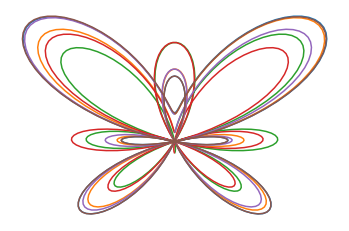

In [6]:
### BEGIN Solution
x = lambda t: np.sin(t) * (np.exp(np.cos(t)) - 2*np.cos(4*t) - np.sin(t/12)**5)
y = lambda t: np.cos(t) * (np.exp(np.cos(t)) - 2*np.cos(4*t) - np.sin(t/12)**5)

t = np.linspace(0, 12*np.pi, 1200)

X = x(t)
Y = y(t)

for i in range(6):  
    plt.plot(X[i*200:(i+1)*200], Y[i*200:(i+1)*200])

plt.axis('off')
plt.show()

### END Solution

## Task 3. Matplotlib (2 points)

Plot the level sets of the $l^p$ norm (actually, this is not a norm for $p<1$)
\begin{equation}
    \|z\|_p = \biggl(\sum_i \lvert x_i\rvert^p\biggr)^\tfrac1{p}
        \,,
\end{equation}
and make the contour of the unit ball in $l^p$ norm stand out. Draw plots
for $p \in \{0, \tfrac1{25}, \tfrac12, 1, 1.5, 2, 7, \infty\}$.

Study plotting examples on [this](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contourf.html#matplotlib.pyplot.contourf) and [this](http://scikit-learn.org/stable/auto_examples/svm/plot_oneclass.html) pages (**especially the last one**) and have a look at these functions: *np.meshgrid*, *np.linspace* in numpy's documentation. We suggest to use `np.linalg.norm`.

Try to produce a plot that **looks like the one below**:

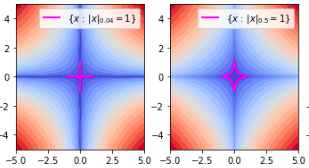

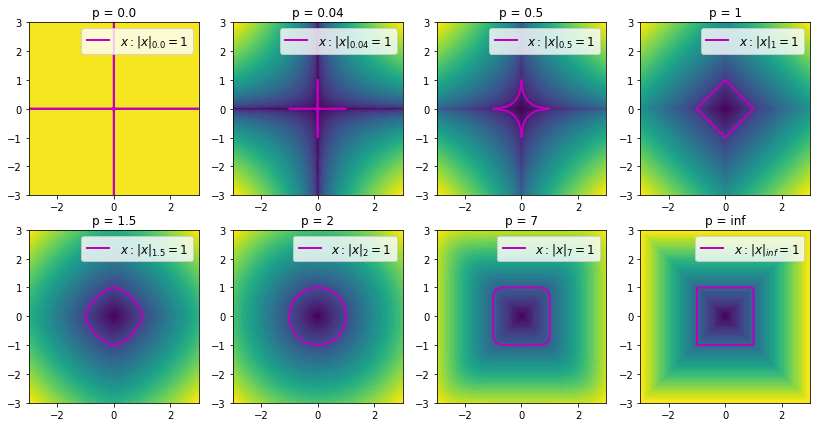

In [7]:
p_values = [0., 0.04, 0.5, 1, 1.5, 2, 7, np.inf]
xx, yy = np.meshgrid(np.linspace(-3, 3, num=101),
                     np.linspace(-3, 3, num=101))

fig, axes = plt.subplots(ncols=(len(p_values) + 1)// 2,
                         nrows=2, figsize=(14, 7))

for p, ax in zip(p_values, axes.flat):
    ### BEGIN Solution
    zz = np.linalg.norm(np.c_[xx.ravel(), yy.ravel()], ord=p, axis=1)
    zz = zz.reshape(xx.shape)
    ax.set_title(f'p = {p}')
    ax.contourf(xx, yy, zz, levels=np.linspace(0, zz.max(), 40))
    cntr = ax.contour(xx, yy, zz, levels=[1], linewidths=2, colors='m')
    ax.legend([cntr.collections[0]], [fr'${{x: |x|_{{{p}}} = 1}}$'], loc='best', fontsize=12)
    
    ### END Solution

plt.show()

## Task 4. Decision Rules and Feature Engeneering (1+1=2 points)

In this task, your goal is to visualize the decision rules of several classifiers applied to artificial $2$-dimensional dataset generated by builtin `sklearn.datasets` method called `make_moons`. In the cell below we generate the dataset.

In [8]:
def make_sunny_moons(n_sun=50, n_moons=100, noise=0.0, sun_radius=1.9, theta=None):
    X_moons, y_moons = make_moons(n_samples=n_moons, noise=noise)
    if not n_sun:
        return X_moons, y_moons
    
    np.random.seed(RANDOM_STATE)
    angles = np.arange(0, 2 * np.pi, 2 * np.pi / n_sun)
    X_sun = sun_radius * np.column_stack([np.cos(angles), np.sin(angles)]) + np.array([0.5, 0.25])
    X_sun += np.random.normal(scale=noise, size=X_sun.shape)
    y_sun = 2 * np.ones(n_sun)
    
    X = np.vstack([X_moons, X_sun])
    y = np.concatenate([y_moons, y_sun]).astype(int)
    X -= X.mean(axis=0)
    
    if theta is None:
        theta = np.pi / 4
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c,-s), (s, c)))
    X = X @ R
    
    return X, y

X, y = make_sunny_moons(n_sun=150, n_moons=300, noise=0.15)

### Subproblem 4.1. Decision Rule Plotting (1 of 2 points)

The goal of the subproblem is to fit the following classifiers on features `X` to target `y`:
* Decision Tree (single!) with small depth ($\leq 4$);
* Random Forest with small number of trees ($\leq 25$) of small depth ($\leq 4$);
* Logistic Regreesion;
* Support Vector Machine with RBF kernel;
* Gaussian Naive Bayes;
* k-Nearest Neighbor Classifier with small number of neighbors (e.g. $3$);

For all the fitted classifiers you have to plot the decision regions (the example is shown below the cell). Each plot must have **Title** which contains name of the classifier and its accuracy (only **two** decimal places) on the data.

You can write the plotting code on your own, but we highly recommend just to use `mlxtend` library (`pip install mlxtend` in linux terminal), which has awesome one-line decision rule plotting function (you are to [google](http://google.com) it).

In [9]:
### BEGIN Solution

dt = DecisionTreeClassifier(max_depth=4, random_state=RANDOM_STATE)
rf = RandomForestClassifier(n_estimators=25, max_depth=4, random_state=RANDOM_STATE, n_jobs=-1)
lr = LogisticRegression(multi_class='auto', solver='lbfgs', random_state=RANDOM_STATE, n_jobs=-1)
svm = SVC(kernel='rbf', gamma='scale', random_state=RANDOM_STATE)
gnb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)

clfs = [dt, rf, lr, svm, gnb, knn]
clfs = [clf.fit(X, y) for clf in clfs]

In [10]:
def plot_decision_result(X, y, clf, clf_name=None):
    plot_decision_regions(X, y, clf=clf, legend=2)
    
    y_pred = clf.predict(X)
    acc_score = accuracy_score(y, y_pred)
    
    if clf_name is None:
        clf_name = clf.__class__.__name__
        
    title = f'{clf_name}, accuracy = {acc_score:.2f}'
    plt.title(title)

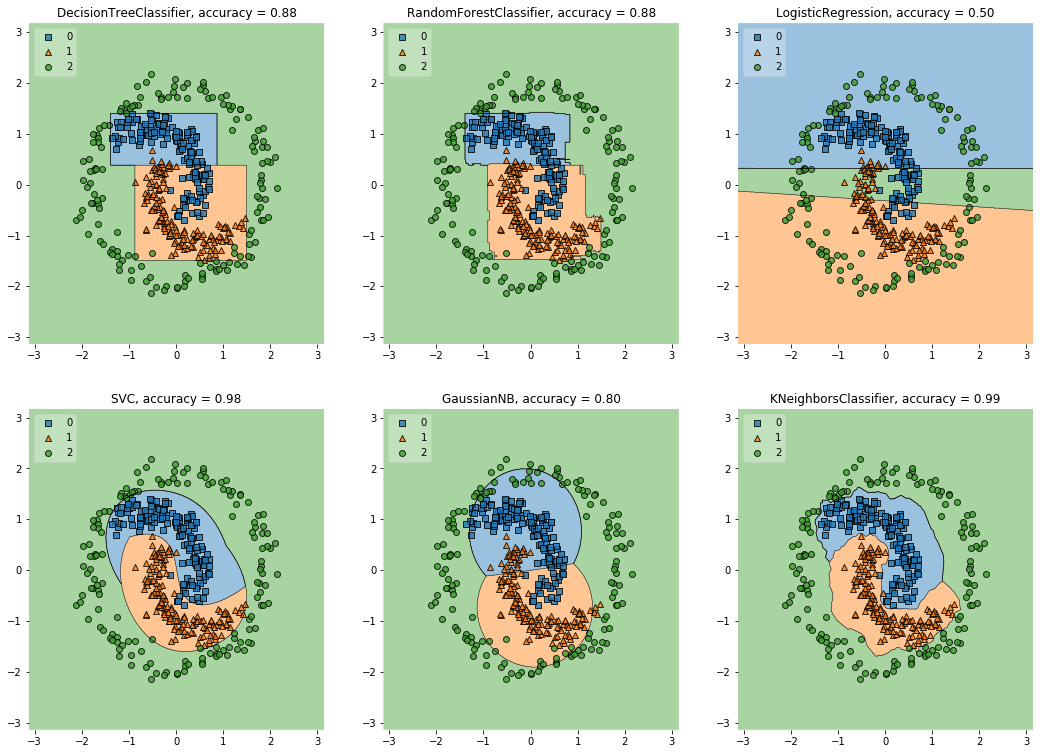

In [11]:
plt.figure(figsize=(18, 13))
gs = gridspec.GridSpec(2, 3)

for clf, grd in zip(clfs, itertools.product([0, 1, 2], repeat=2)):

    plt.subplot(gs[grd[0], grd[1]])
    plot_decision_result(X, y, clf)

plt.show()

### END Solution

### Subproblem 4.2. Pipeline: Fitting to Data by Feature Engeneering (1 of 2 points)
In previous task 4.1 several classifiers obviously failed fitting to data. This happend because the decision rule of the classifier has a restricted form (e.g. linear for linear models), while the data is more complicated.

One may try to change the parameters of the classifier (e.g. increase the number of trees in Forest) in order to improve accuracy, but some models (especially linear) do not have parameters that can change the form of the decision rule.

In this case the **feature engeneering** helps: one may try to compute new (e.g. non-linear) features based on the existing pool and fit the classifier in the new features. This may help low-complex classifiers to fit to hard data dependencies.

Your task it to
* Choose **two classifiers** from the previous problem among Decision Tree, Random Forest, Naive Bayes, Logistic Regression;
* By generating of additional features (e.g. polynomial) make them achieve accuracy $>0.95$.
* For each classifier, write 2-3 sentences why did you choose these features.
* Plot their decision rules in the original feature space.

It is your choice how to generate features. You may create hand-crafted featues and add them manually. Nevertheless, we **highly suggest** to get used to and apply the following builtin `sklearn` methods:
* `PolynomialFeatures`, `GaussianRandomProjection` among others - for feature generation
* `StandartScaler`, `MinMaxScaler` among others - for feature scaling
* `Pipeline` - for combining several operations in a row (e.g. feature creation & prediction)

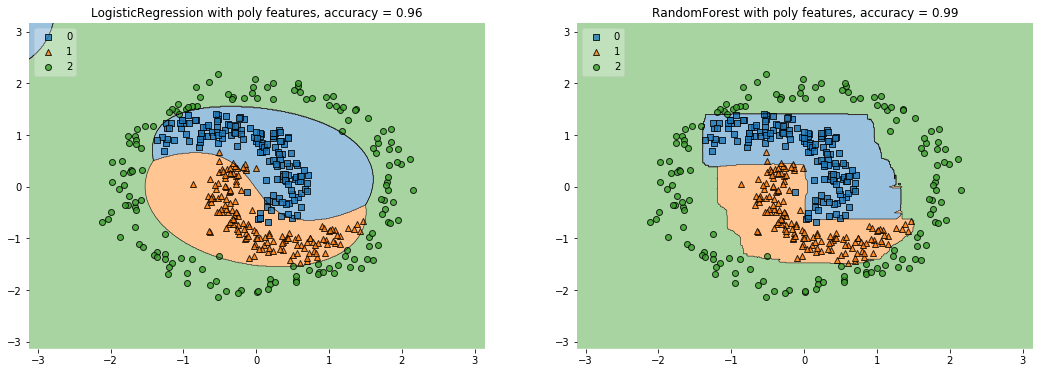

In [12]:
### BEGIN Solution

lr_pipe = Pipeline(steps=[('PolynomialFeatures', PolynomialFeatures(3)),
                          ('StandartScaler', StandardScaler()),
                          ('Logistic Regression', LogisticRegression(solver='lbfgs', multi_class='auto',
                                                                     n_jobs=-1, random_state=RANDOM_STATE))  
                          ])

rf_pipe = Pipeline(steps=[('PolynomialFeatures', PolynomialFeatures(3)),
                          ('StandartScaler', StandardScaler()),
                          ('Logistic Regression', RandomForestClassifier(n_estimators=100, max_depth=5, 
                                                                         n_jobs=-1, random_state=RANDOM_STATE))  
                          ])

lr_pipe.fit(X, y)
rf_pipe.fit(X, y)


plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plot_decision_result(X, y, clf=lr_pipe, clf_name='LogisticRegression with poly features')

plt.subplot(1, 2, 2)
plot_decision_result(X, y, clf=rf_pipe, clf_name='RandomForest with poly features')

### END Solution

- This data is the typically example of so-called a Kernel Trick. In the widespread example always use a quadratic kernel, but obviously it's not enough for our data. Therefore I decided to use Polynomial Kernel of degree 3.
- This had almost no effect on RandomForest, because this is already a good algorithm for linearly inseparable data.
- The Polynomial Kernel helped to significantly improve the quality of LogReg, because we have moved in a space where the data is linearly separable.

## Task 5. Model Selection (1+1 points)

You are to test Random Forests and Support Vector Machines on a trivial [Tic Tac Toe Endgame Dataset](https://datahub.io/machine-learning/tic-tac-toe-endgame). Let's load it.

In [13]:
data = pd.read_csv('data/tic-tac-toe.csv')
X, y = data.drop('class', axis=1), data['class'].astype(int)
data.sample(3)

,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
760,o,x,x,o,o,b,x,x,o,False
495,b,x,x,b,o,x,o,o,x,True
546,b,o,x,o,b,x,x,o,x,True


The dataset consists of several possible endgame positions of the Tic-Tac-Toe game. The target variable is the victory of `x` player over `o` player (victory or defeat/draw). Since the features are categorical, we simply transform them to real-valued $-1$ for `o`, $1$ for `x` and $0$ for emply cell `b`.

In [14]:
X = X.applymap(lambda v: 1 if v == 'x' else -1 if v == 'o' else 0)
X.sample(4).sort_index()

,TL,TM,TR,ML,MM,MR,BL,BM,BR
120,1,-1,1,1,0,0,1,-1,-1
538,0,-1,1,-1,1,-1,1,1,0
669,1,1,0,-1,-1,-1,0,0,1
773,-1,1,1,0,-1,0,0,1,-1


We are going to test how machine learning algorithms can classify the final game positions into the ones when `x` player won and all others. Everybody knows that for this problem there is a simple decision rule: `x` wins if there are three `x`'s in a row/column/diagonal. But can our cool machine learning tools catch this trivial dependence? In this problem, the class balance is around $2:1$ so we still use accuracy metric.

Intuitively, this rule is logical, i.e. one may expect decision-tree-based algorithm to be the most appropriate for this case. But is that true? In the code below we compare huge Random forest with simple Logistic Regression and SVM with default parameters.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

np.random.seed(RANDOM_STATE)
test_idx = list(np.random.choice(range(len(X)), 650, replace=False))
train_idx = [i for i in range(len(X)) if i not in test_idx]

Note that we will use only $\frac{1}{3}$ of data to train and $\frac{2}{3}$ to test the model.

In [16]:
rf = RandomForestClassifier(n_estimators=400, max_depth=10, random_state=RANDOM_STATE)
svm = SVC(gamma='auto')
lr = LogisticRegression(solver='lbfgs')
clfs = (rf, svm, lr)

for clf in clfs:
    clf.fit(X.iloc[train_idx], y.iloc[train_idx])
    score = accuracy_score(y.iloc[test_idx], clf.predict(X.iloc[test_idx]))
    name = clf.__class__.__name__

    print(f'{name} scored {round(score, 3)}')

RandomForestClassifier scored 0.962
SVC scored 0.974
LogisticRegression scored 0.98


We see all the models provide reasonable quality. Yet we are not satisfied!

### Subproblem 5.1. Model selection for SVM (1 of 2 points)
Perform **Grid Search** on train set for optimal hyperparameter for SVM model in order to achieve 5-fold validation score on the data not lower than $0.98$. You can code the Grid Search Manually, but we highly encourage yo use builtin `GridSearchCV` method. **Report** the validation accuracy score, test accuracy score and best found hyper parameters. **Explain** the results: does your model overfit?

In [17]:
### BEGIN Solution
parameters = {'kernel': ('linear', 'rbf', 'poly'), 
              'C': (0.01, 0.05, 0.1, 0.5, 1, 5, 10),
              'degree': (2, 3, 4, 7, 9),
              'gamma': ('scale', 'auto'),
             }

svc = SVC(random_state=RANDOM_STATE)
gs_cv = GridSearchCV(svc, parameters, n_jobs=-1, cv=5, iid=True)

gs_cv.fit(X.iloc[train_idx], y.iloc[train_idx])

print(f'Best params: {gs_cv.best_params_}')

best_est = gs_cv.best_estimator_

# It's not clear from task description, what data should be used for cv testing
cv_score = cross_val_score(best_est, X, y, cv=5, n_jobs=-1)

y_pred = best_est.predict(X.iloc[test_idx])
test_score = accuracy_score(y.iloc[test_idx], y_pred)

print(f'Cross-Validation score on the full data: {cv_score.mean():.3f} ± {cv_score.std():.3f}')
print(f'Test score: {test_score:.3f}')
### END Solution

Best params: {'C': 5, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
Cross-Validation score on the full data: 0.983 ± 0.034
Test score: 0.986


- Yep, I'm sure, because we split the data independently, not knowing about the label distribution. We should use the stratified splitting.

### Subproblem 5.2. Feature engeneering for Random Forest  (1 of 2 points)
Perform **feature engeneering** for Random Forest with parameters from the example in order to achieve 5-fold validation score on train set not lower than $0.96$. **Write** 2-3 sentences to explicitly explain your motivation for provided feature choice. Fit the model on the whole train set and **provide** the test score. 

In [18]:
X_fe = X.copy()
X_fe['1st_fill'] = X_fe.apply(lambda x: x[x==1].shape[0], axis=1)
X_fe['2nd_fill'] = X_fe.apply(lambda x: x[x==-1].shape[0], axis=1)
X_fe['empty'] = X_fe.apply(lambda x: x[x==0].shape[0], axis=1)

X_fe.sample(3)

,TL,TM,TR,ML,MM,MR,BL,BM,BR,1st_fill,2nd_fill,empty
818,-1,-1,-1,1,1,0,0,1,0,3,3,3
556,0,-1,1,0,1,0,1,0,-1,3,2,4
734,1,0,0,1,1,0,-1,-1,-1,3,3,3


In [19]:
rf = RandomForestClassifier(n_estimators=400, max_depth=10, random_state=RANDOM_STATE, n_jobs=-1)
rf.fit(X_fe.iloc[train_idx], y.iloc[train_idx])

cv_score = cross_val_score(rf, X_fe.iloc[train_idx], y.iloc[train_idx], cv=5, n_jobs=-1)
test_score = accuracy_score(y.iloc[test_idx], rf.predict(X_fe.iloc[test_idx]))

y_pred = rf.predict(X_fe.iloc[test_idx])
test_score = accuracy_score(y.iloc[test_idx], y_pred)

print(f'RF cv score:\t{cv_score.mean():.3f} ± {cv_score.std():.3f}')
print(f'RF test scores:\t{test_score}')

RF cv score:	0.964 ± 0.024
RF test scores:	0.9815384615384616


Let's to think about the outcome of the game:
 - If you start first and have more filled cells, then you're definitely a winner;
 - If you start second and have less filled cells, then you're definitely a looser;
 - ....
 - etc.
 
Therefore, the count of filled cells is a good feature.

## Task 6. Bagging Ensembles of Regressors (2 points)
In this problem, you are to deal with [Concrete Compressive Strength Dataset](https://www.kaggle.com/elikplim/concrete-compressive-strength-data-set). You goal will be to determine the optimal parameters for two Bagging-Based Forest Ensemble **Regressors** and compare the forests. Let's load the data and split it into test and train parts.

In [20]:
data = pd.read_csv('data/concrete.csv').astype(float)
X = data.drop('concrete_compressive_strength', axis=1)
y = data.concrete_compressive_strength

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

data.sample(3).sort_index()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
823,322.0,0.0,0.0,203.0,0.0,974.0,800.0,180.0,29.59
878,133.0,210.0,0.0,196.0,3.0,949.0,795.0,28.0,31.03
911,148.0,0.0,182.0,181.0,15.0,839.0,884.0,28.0,15.52


Please note that both in Task 4 and Task 5 the whole data was the Train Data. In Task 4 the output score (accuracy) was the **train** score (i.e. the score on the train data of the model fitted on the same data). In task 5 the output score was the **validation score**, i.e. the result of validating the model on the train data.

In this problem, we do a step further and split the whole data into train part (on which we train & validate) and test part (where we compute the final **test** score on the validated model).

In this problem, you are to consider the `RandomForestRegressor` and `ExtraTreesRegressor` models for the prediction of concrete compressive strength under **squared loss function** (mean squared error). Recall that Random Forest was discussed in the lectures. [Extremely Randomized Forest](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.65.7485&rep=rep1&type=pdf) is another bootstraped forest with simple tree building algorithm. Basically, each split of each tree node is chosen at random both w.r.t. feature and threshold (while in random forest the split minimizes impurity).

You have to do the following steps and answer the following questions:
* For both Forests perform the Grid Search (on the train data) over most important algorithm's parameters (what are they?) to determine the optimal hyperparameters.
* For the optimal parameters output the train, validation score and the score for predicting for the test data.
* Compare the obtained scores. Explain, why the scores differ a lot for train and validation/test.
* Which of the algorithms perform better on the training set? Explain why!

In [21]:
### BEGIN Solution
clfs = [RandomForestRegressor(n_jobs=-1, random_state=RANDOM_STATE),
        ExtraTreesRegressor(n_jobs=-1, random_state=RANDOM_STATE)]

parameters = {'n_estimators': (50, 100, 150, 200, 300, 400),
              'max_depth': (2, 3, 4, 6, 7, 9, 11, None),
              'max_features' : ('auto', 'sqrt', 'log2')
              }

for clf in clfs:
    gs = GridSearchCV(clf, parameters, cv=5, iid=True,
                       scoring='neg_mean_squared_error', n_jobs=-1)
    gs.fit(X_train, y_train)
    best_est = gs.best_estimator_
    
    print(f'{clf.__class__.__name__} best params: {gs.best_params_}')
    
    y_train_pred = best_est.predict(X_train)
    train_score = mean_squared_error(y_train, y_train_pred)

    cv_score = -cross_val_score(best_est, X_train, y_train, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

    y_test_pred = best_est.predict(X_test)
    test_score = mean_squared_error(y_test, y_test_pred)

    print(f'\n{clf.__class__.__name__} MSE:')
    print(f'\tTrain mean:\t {train_score:.3f}')
    print(f'\tCV mean:\t {cv_score.mean():.3f} ± {cv_score.std():.3f}')
    print(f'\tTest:\t\t {test_score:.3f}\n')
### END Solution

RandomForestRegressor best params: {'max_depth': None, 'max_features': 'log2', 'n_estimators': 400}

RandomForestRegressor MSE:
	Train mean:	 4.340
	CV mean:	 28.546 ± 6.107
	Test:		 25.112

ExtraTreesRegressor best params: {'max_depth': None, 'max_features': 'auto', 'n_estimators': 300}

ExtraTreesRegressor MSE:
	Train mean:	 1.288
	CV mean:	 25.319 ± 5.977
	Test:		 23.483



1. The most important params for "trees" are a `count of trees` and `depth of each one`.
2. Each of the ML algorithms a bit of overfitting on train data, because the algorithm try to less the lossen function. Therefore, the train score is much better than val/test score.
3. `RF` has better quality on the train set than `ExtraTrees`. The `ExtraTrees` don't use OOB(Out-of-Bag score) for training or the same thing don't use the `Bagging`. Therefore, `ExtraTrees` overfits on the train data more than `RF`.

## Task 7. Multi-Class Classification Strategies (2 points)
In this task, you deal with multiclass classification problem for [Glass Classification Data](https://www.kaggle.com/uciml/glass). Let's load the dataset.

In [22]:
data = pd.read_csv('data/glass.csv')
X, y = data.drop('Type', axis=1), data.Type
data.sample(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.00,1
196,1.51556,13.87,0.00,2.54,73.23,0.14,9.41,0.81,0.01,7
181,1.51888,14.99,0.78,1.74,72.50,0.00,9.95,0.00,0.00,6


The features of each glass oject correspond to the fraction of the particular chemical element in the object. The target variable corresponds to the type of glass (6 classes).

In this problem, you have to empirically compare the time complexity and performance of several multiclass labeling strategies for different algorithms. You must consider the following algorithms:
* Single Decision Tree (depth 7)
* Medium Random Forest (100 trees of depth 3)
* KNearestNeighbors (5 neighbors)
* Logistic Regression

Note that all these algorithms by default support **multiclass labeling**. Nevertheless, we want you to compare this approach with **OneVSRest** and **OneVSOne** approaches applied to this algorithms. More precisely, for every pair (algorithm, approach) you are to perform 5-fold cross validation on the data and output the validation score and the computation time in the **table** form. Please note that you also have to choose the metric to optimize during CV (e.g. accuracy, balanced accuracy) on your own. 

After that, you are to answer the following questions:
* Which metric did you choose to optimize during cross validation and why? Explain
* For which algorithms the usage of OneVSRest/OneVSOne approach provides significantly better performance without significant increase in computation time?

In [23]:
clfs = [DecisionTreeClassifier(max_depth=7), RandomForestClassifier(n_estimators=100, max_depth=7, n_jobs=-1),
        KNeighborsClassifier(n_neighbors=5, n_jobs=-1),  LogisticRegression(n_jobs=-1)]

clf_strategies = [[clf, 
                   OneVsOneClassifier(clf, n_jobs=-1), 
                   OneVsRestClassifier(clf, n_jobs=-1)] for clf in clfs]

clf_names = [clf.__class__.__name__ for clf in clfs]
strategy_names = ['Multiclass', 'OneVsOne', 'OneVsRest']

clf_scores = pd.DataFrame(index=strategy_names, columns=clf_names)
clf_times = pd.DataFrame(index=strategy_names, columns=clf_names)

metric = 'f1_macro'

In [24]:
for clf_strategy, clf_name in zip(clf_strategies, clf_names):
    print(clf_name)
    for clf, strategy_name in zip(clf_strategy, strategy_names):
        print(f'\t{strategy_name}')
        start = time.time()
        cv_score = cross_val_score(clf, X, y, scoring=metric, cv=5, n_jobs=-1)
        end = time.time() - start
        
        clf_scores[clf_name][strategy_name] = f'{cv_score.mean():.3f} ± {cv_score.std():.3f}'
        clf_times[clf_name][strategy_name] = end

DecisionTreeClassifier
	Multiclass
	OneVsOne
	OneVsRest
RandomForestClassifier
	Multiclass
	OneVsOne
	OneVsRest
KNeighborsClassifier
	Multiclass
	OneVsOne
	OneVsRest
LogisticRegression
	Multiclass
	OneVsOne
	OneVsRest


In [25]:
print('Scores')
clf_scores.head()

Scores


,DecisionTreeClassifier,RandomForestClassifier,KNeighborsClassifier,LogisticRegression
Multiclass,0.538 ± 0.104,0.662 ± 0.080,0.497 ± 0.094,0.408 ± 0.078
OneVsOne,0.612 ± 0.115,0.621 ± 0.102,0.505 ± 0.088,0.414 ± 0.129
OneVsRest,0.492 ± 0.091,0.634 ± 0.054,0.556 ± 0.124,0.408 ± 0.078


In [26]:
print('Times')
clf_times.head()

Times


,DecisionTreeClassifier,RandomForestClassifier,KNeighborsClassifier,LogisticRegression
Multiclass,0.027323,0.541046,0.246807,0.0606647
OneVsOne,0.281141,9.32678,6.69935,0.267638
OneVsRest,0.235828,2.54799,1.52126,0.236327


1. It's the classification problem and I want to consider precision and recall together. The f1-score allows do it.
2. Only the `DecisionTreeClassifier` using the `OneVsOne` strategy approach of the perfomance of quality on 10%.